# Lab 2
Le domaine spatiale

In [3]:
import math

import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from scipy import signal
import random

## Exercice 1
Créer un filtre 5x5 linéaire avec les distances Tchebychev à partir du centre.

<img src="distance tchebychev.PNG"
     alt="Error can't fetch img"
     style="float: left" />
     
> Défi: À l'aide de numpy,  
> faite le en moins de 4 lignes

> Indices:  
> \- `np.full()`  
> \- `np.ones()`  
> \- `np.zeros()`  
> \- les *slices*

In [4]:
tchebychev = [[max(abs(i - 2), abs(j - 2)) for j in range(5)] for i in range(5)]
tchebychev = np.array(tchebychev)
print(tchebychev)

[[2 2 2 2 2]
 [2 1 1 1 2]
 [2 1 0 1 2]
 [2 1 1 1 2]
 [2 2 2 2 2]]


## Exercice 2
Créer un histogramme des intensités dans le filtre au premier exercice.
> Utiliser `ndarray.flatten()` et `plt.hist()`

> Défi: Ajouter un titre et des *labels* sur les axes.

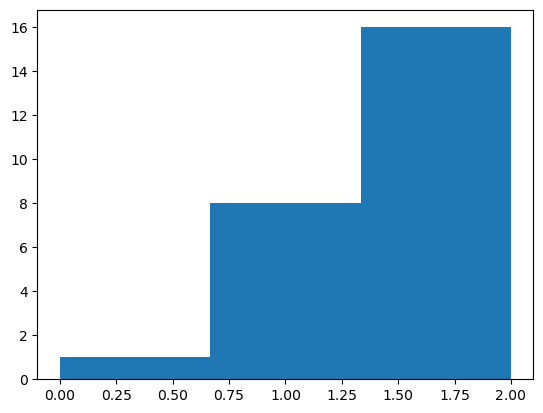

In [5]:
tchebychev_hist = tchebychev.flatten()
tchebychev_hist = plt.hist(tchebychev_hist, bins=3)
plt.show()

## Exercice 3
Créer un filtre linéaire 5x5 avec les distances Euclidienne à partir du centre.

<img src="distance euclidienne.PNG"
     alt="Error can't fetch img"
     style="float: left" />

[[2.82842712 2.23606798 2.         2.23606798 2.82842712]
 [2.23606798 1.41421356 1.         1.41421356 2.23606798]
 [2.         1.         0.         1.         2.        ]
 [2.23606798 1.41421356 1.         1.41421356 2.23606798]
 [2.82842712 2.23606798 2.         2.23606798 2.82842712]]


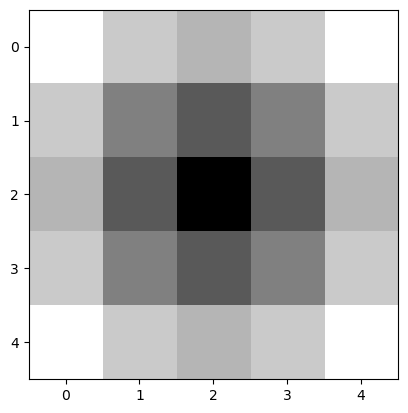

In [6]:
eucli = np.full((5, 5), -1, dtype=float)

middle_x = eucli.shape[0] // 2
middle_y = eucli.shape[1] // 2

for i in range(eucli.shape[0]):
    for j in range(eucli.shape[1]):
        eucli[i, j] = math.sqrt((middle_x - i)**2 + (middle_y - j)**2)

print(eucli)
plt.imshow(eucli, cmap='gray')
plt.show()

## Exercice 4
Inversé l'intensité des pixels dans le filtre euclidien au numéro précédent.

> Le résultat ressemble à un filtre Gaussien

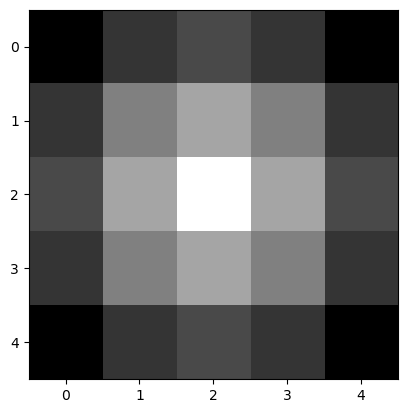

In [7]:
eucli_flatten = eucli.flatten()
val_min = eucli_flatten.min()
val_max = eucli_flatten.max()

eucli_inv = (val_max - eucli_flatten + val_min) / (val_max - val_min)
eucli_inv = eucli_inv.reshape(eucli.shape)

plt.imshow(eucli_inv, cmap='gray')
plt.show()


## Exercice 5
Qu'elle est la différence entre l'application d'une convolution versus une corrélation?

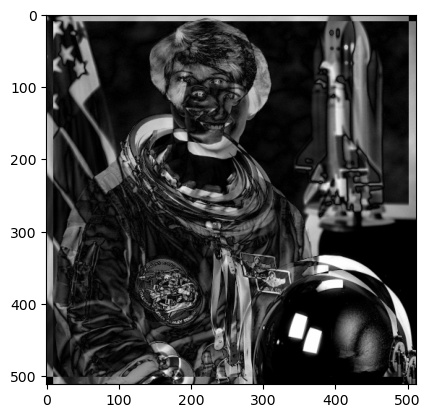

In [8]:
# Pour tester

img = color.rgb2gray(data.astronaut())
kernel = np.array([[1, 0, 0], [0, 0, 0], [0, 0, 0]])

convolved_image = img.copy()
correlated_image = img.copy()

for i in range(10):
    convolved_image = signal.convolve2d(convolved_image, kernel, mode='same')
    correlated_image = signal.correlate2d(correlated_image, kernel, mode='same')

diff = abs(convolved_image - correlated_image)

plt.imshow(img, cmap='gray')
plt.imshow(convolved_image, cmap='gray', alpha=0.5)
plt.imshow(correlated_image, cmap='gray', alpha=0.5)
plt.imshow(diff, cmap='gray')
plt.show()


## Exercice 6
Implémenter et appliquer un filtre médian afin de restorer l'image dans `img`.
> Compléter les sections TODO

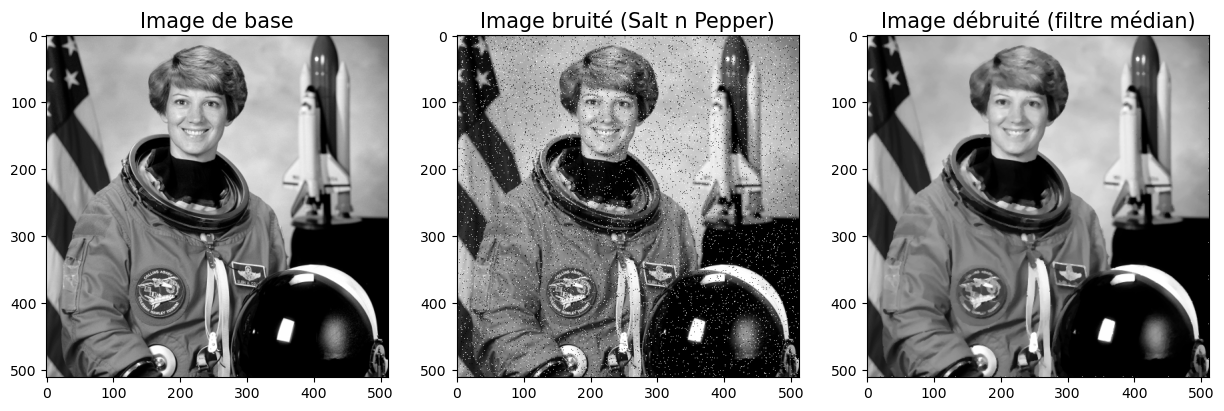

In [14]:
# Add salt and pepper noise
plt.figure(figsize=(15,15))

plt.subplot(131)
plt.title('Image de base', fontsize=15)

# Get image
img = color.rgb2gray(data.astronaut())

plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.title('Image bruité (Salt n Pepper)', fontsize=15)

# Add salt n pepper noise to img
nb_pixel = img.shape[0] * img.shape[1]
noise_p = 0.025

# salt
for i in range(round(nb_pixel * noise_p)):
    x = random.randint(0, img.shape[0]-1)
    y = random.randint(0, img.shape[1]-1)
    img[x, y] = 1

# pepper
for i in range(round(nb_pixel * noise_p)):
    x = random.randint(0, img.shape[0]-1)
    y = random.randint(0, img.shape[1]-1)
    img[x, y] = 0

plt.imshow(img, cmap='gray')

plt.subplot(133)
plt.title('Image débruité (filtre médian)', fontsize=15)

# Padding
padding = ... #TODO

# Apply median filter on img using padding
# TODO

for i in range(1, img.shape[0] - 1):
    for j in range(1, img.shape[1] - 1):
        # img[i, j] = np.median(img[i-1:i+2, j-1:j+2])
        noyau = img[i-1:i+2, j-1:j+2]
        noyau = np.sort(noyau.flatten())
        img[i, j] = noyau[4]


plt.imshow(img, cmap='gray')

plt.show()

## Exercice 7
Quiz sur différent résultat de convolution?

In [36]:
...

Ellipsis

## Extra
Pour ceux qui on de la misère à comprendre comment et pourquoi faire de l'égalisation d'histogramme:
- [Comment: vidéo youtube](https://www.youtube.com/watch?v=PD5d7EKYLcA)
- [Exemple/Pourquoi: notebook sur Github](https://github.com/MubashirullahD/diplab06/blob/master/Histogram%20Equalization.ipynb)